In [1265]:
import numpy as np
import pandas as pd

__Importing the Car Evaluation Dataset__

In [1267]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# # metadata 
# print(car_evaluation.metadata) 
  
# # variable information 
# print(car_evaluation.variables)

In [1268]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 6)
(1728, 1)


In [1269]:
# X.describe()

In [1270]:
# y.describe()

__One Hot Encoding__

In [1272]:
X_encoded = pd.get_dummies(X) # One hot encoding
y_encoded = pd.get_dummies(y) # One hot encoding

# print(X_encoded)
# print(y_encoded)

print(type(X))
print(type(y))

print(X_encoded.shape)
print(y_encoded.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 21)
(1728, 4)


__Dataset Partitioning__

In [1274]:
from sklearn.model_selection import train_test_split

# data split, 70% training and 30% temp (temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# 30% temp data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [1275]:
# X_train

In [1276]:
# y_train

In [1277]:
# X_val

In [1278]:
# y_val

In [1279]:
# X_test

In [1280]:
# y_test

__Building a Single Decision Tree__

In [1282]:
from sklearn.tree import DecisionTreeClassifier
single_decision_tree_classifier = DecisionTreeClassifier()

In [1283]:
single_decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

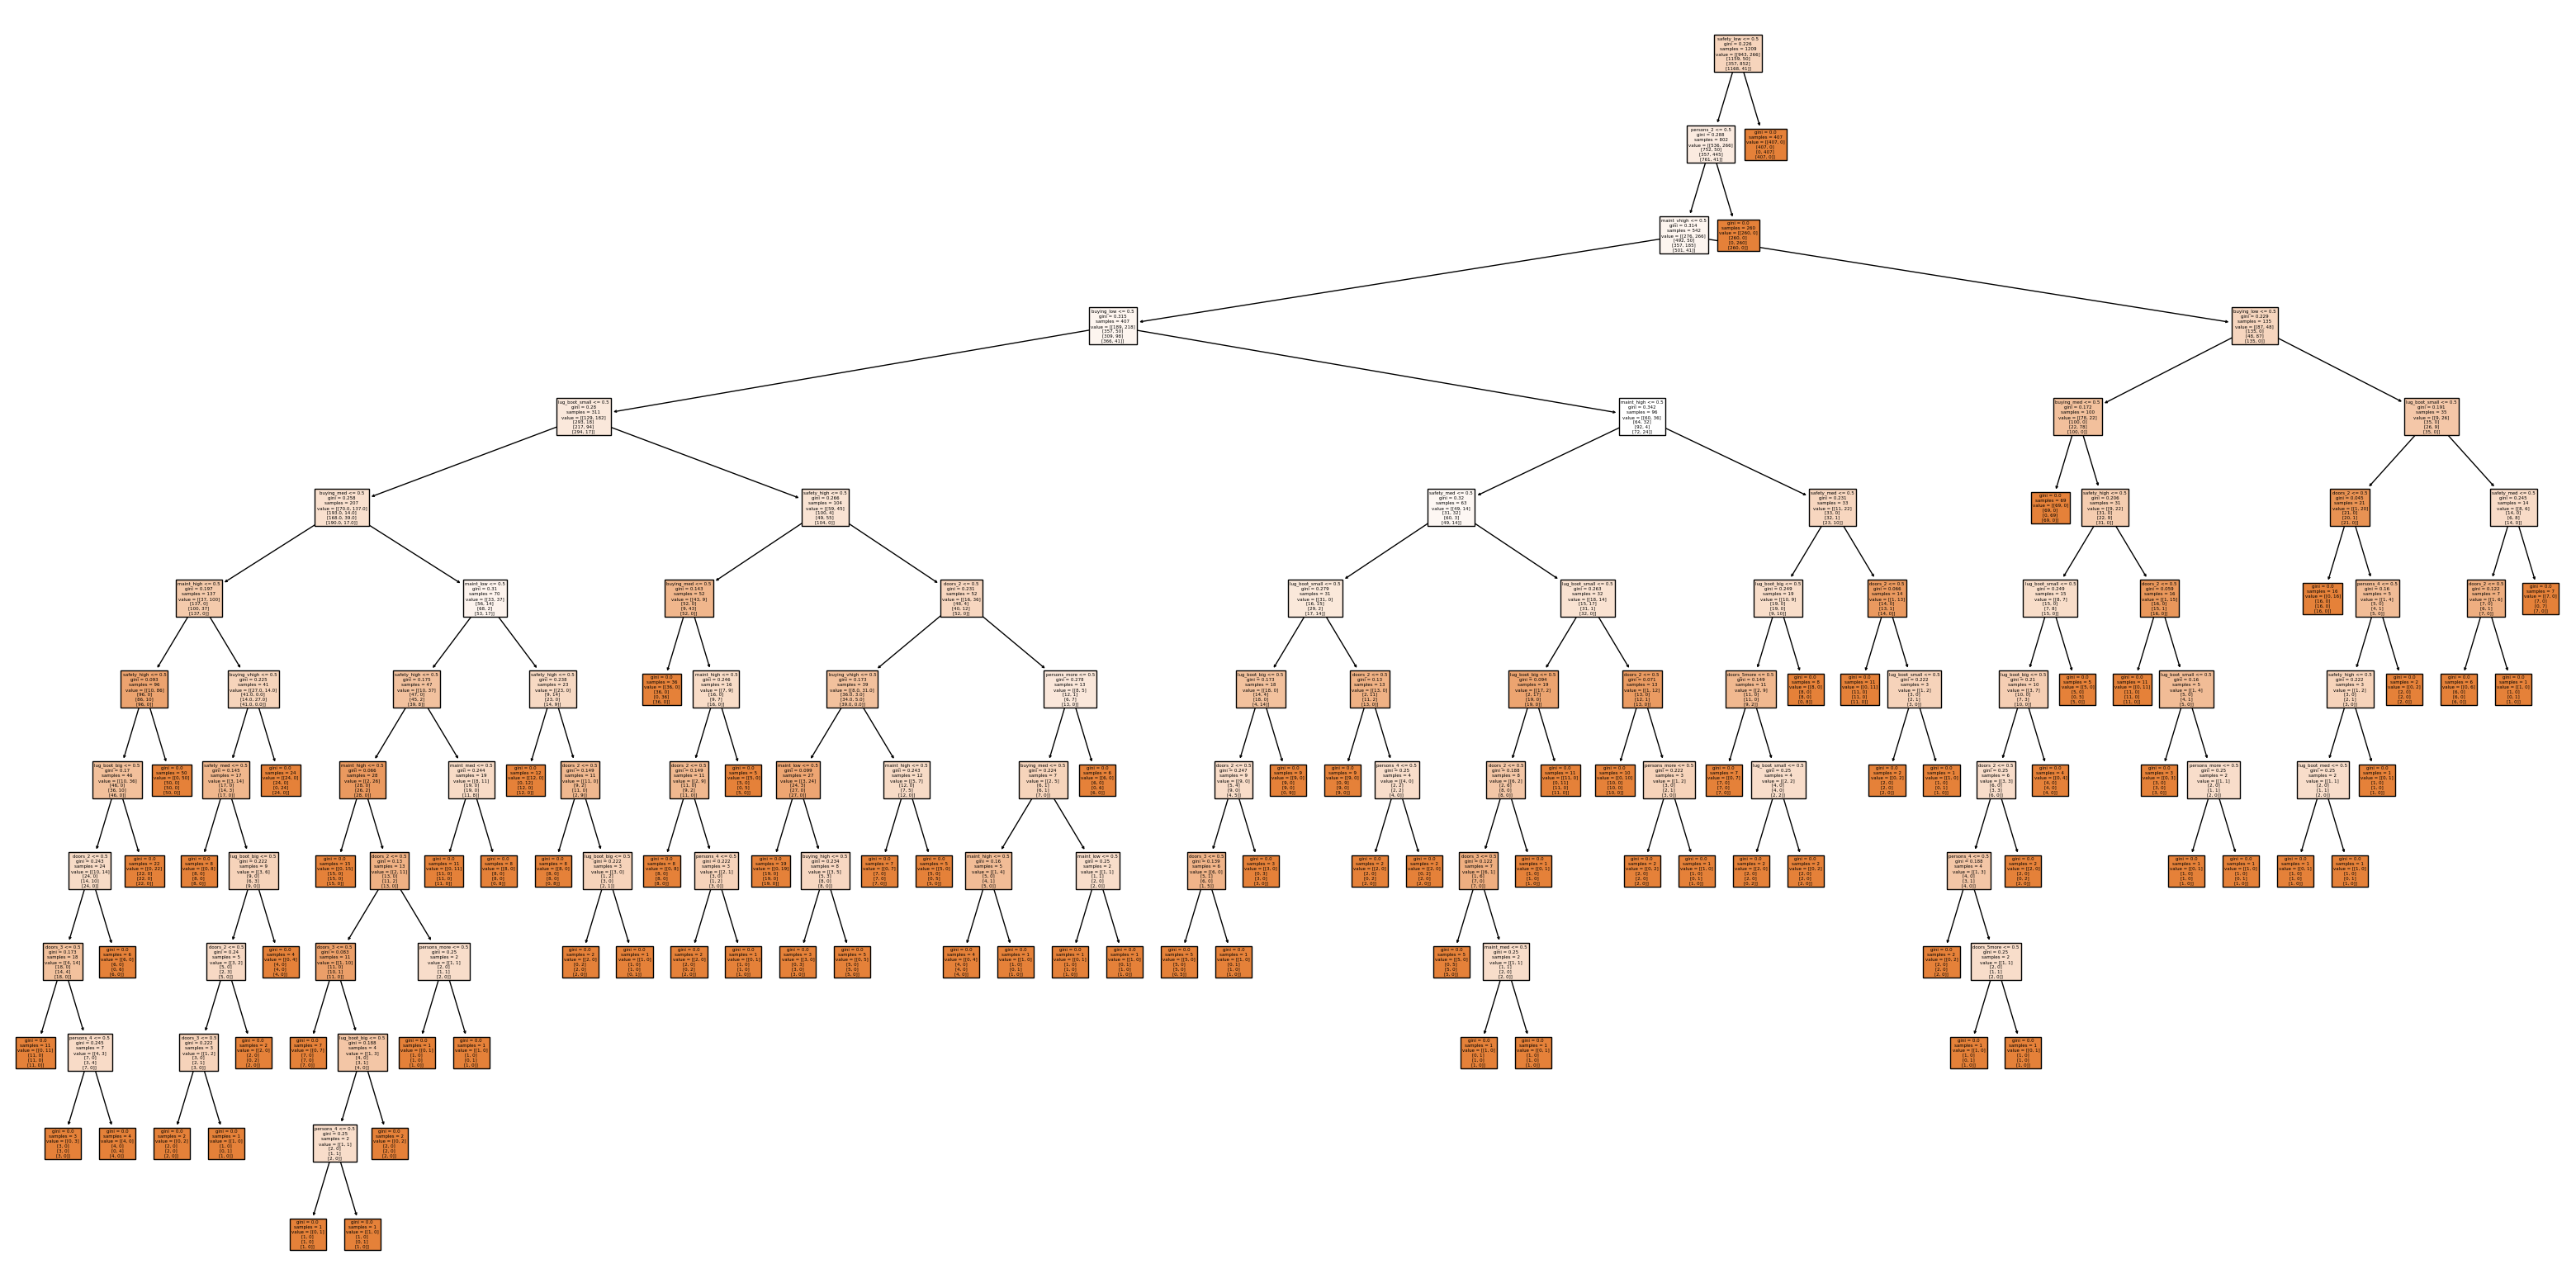

In [1284]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(single_decision_tree_classifier, filled=True, feature_names=X_train.columns, class_names=single_decision_tree_classifier.classes_)
plt.show()

In [1285]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter Tuning for Decision Tree Classifier
# dt_params = {'max_depth': [10, 11, 12, 13, 14, 15, 16], 'min_samples_split': [2, 3, 4, 5, 5, 6, 7, 8, 9]}
# dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
# dt_grid.fit(X_train, y_train)

# best_params = dt_grid.best_params_
# print(f"Best Hyperparameters: {best_params}")

In [1286]:
# # Step 1: Retrieve the best parameters from GridSearchCV
# # best_params = dt_grid.best_params_

# # Step 2: Initialize a new Decision Tree Classifier with the best parameters
# best_dt_model = DecisionTreeClassifier(**best_params)

# # Step 3: Fit the model on the training set
# best_dt_model.fit(X_train, y_train)

# # Step 4: Evaluate on the validation set
# y_val_pred = best_dt_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy}")

# # Step 5: Evaluate on the test set
# y_test_pred = best_dt_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy}")

__Validation Set__

In [1288]:
# y_val contains actual ground truth labels of the validation set
# y_val_pred is our model's prediction on the X_val (validation set)

y_val_pred = single_decision_tree_classifier.predict(X_val)

print(y_val)
print(type(y_val))
print(y_val.shape)

print(y_val_pred)
print(type(y_val_pred))
print(y_val_pred.shape)

      class_acc  class_good  class_unacc  class_vgood
192       False       False         True        False
834       False       False         True        False
677       False       False         True        False
1516      False       False         True        False
1157      False       False        False         True
...         ...         ...          ...          ...
582       False       False         True        False
1450       True       False        False        False
244       False       False         True        False
907        True       False        False        False
1540      False       False         True        False

[259 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
(259, 4)
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [ True False False False]
 [False False  True False]]
<class 'numpy.ndarray'>
(259, 4)


In [1289]:
y_val_rows, y_val_cols = y_val.shape
print(y_val_rows)
print(y_val_cols)

y_val_pred_rows, y_val_pred_cols = y_val_pred.shape
print(y_val_pred_rows)
print(y_val_pred_cols)

if y_val_rows == y_val_pred_rows:
    rows = y_val_rows
    print(f"rows = {rows}")

if y_val_cols == y_val_pred_cols:
    cols = y_val_cols
    print(f"columns = {cols}")

259
4
259
4
rows = 259
columns = 4


__Manually building the Confusion Matrix on the Validation Set__

In [1291]:
acc_acc = acc_good = acc_unacc = acc_vgood = 0
good_acc = good_good = good_unacc = good_vgood = 0
unacc_acc = unacc_good = unacc_unacc = unacc_vgood = 0
vgood_acc = vgood_good = vgood_unacc = vgood_vgood = 0

for i in range(rows):
    actual = y_val.iloc[i].values # <class 'pandas.core.frame.DataFrame'>
    predicted = y_val_pred[i] # <class 'numpy.ndarray'>
    
    if actual[0] == True and predicted[0] == True:
        acc_acc += 1
    elif actual[0] == True and predicted[1] == True:
        acc_good += 1
    elif actual[0] == True and predicted[2] == True:
        acc_unacc += 1
    elif actual[0] == True and predicted[3] == True:
        acc_vgood += 1
    
    if actual[1] == True and predicted[0] == True:
        good_acc += 1
    elif actual[1] == True and predicted[1] == True:
        good_good += 1
    elif actual[1] == True and predicted[2] == True:
        good_unacc += 1
    elif actual[1] == True and predicted[3] == True:
        good_vgood += 1

    if actual[2] == True and predicted[0] == True:
        unacc_acc += 1
    elif actual[2] == True and predicted[1] == True:
        unacc_good += 1
    elif actual[2] == True and predicted[2] == True:
        unacc_unacc += 1
    elif actual[2] == True and predicted[3] == True:
        unacc_vgood += 1

    if actual[3] == True and predicted[0] == True:
        vgood_acc += 1
    elif actual[3] == True and predicted[1] == True:
        vgood_good += 1
    elif actual[3] == True and predicted[2] == True:
        vgood_unacc += 1
    elif actual[3] == True and predicted[3] == True:
        vgood_vgood += 1

print("Confusion Matrix:")
print(f"[{acc_acc}, {acc_good}, {acc_unacc}, {acc_vgood}]")
print(f"[{good_acc}, {good_good}, {good_unacc}, {good_vgood}]")
print(f"[{unacc_acc}, {unacc_good}, {unacc_unacc}, {unacc_vgood}]")
print(f"[{vgood_acc}, {vgood_good}, {vgood_unacc}, {vgood_vgood}]")

Confusion Matrix:
[51, 1, 3, 2]
[1, 8, 0, 1]
[2, 0, 176, 0]
[1, 1, 0, 12]


__Creating a List Containing the Confusion Matrix of Validation Set__

In [1293]:
confusion_matrix = [[acc_acc, acc_good, acc_unacc, acc_vgood],
                   [good_acc, good_good, good_unacc, good_vgood],
                   [unacc_acc, unacc_good, unacc_unacc, unacc_vgood],
                   [vgood_acc, vgood_good, vgood_unacc, vgood_vgood]]
print(confusion_matrix)
print(type(confusion_matrix))

[[51, 1, 3, 2], [1, 8, 0, 1], [2, 0, 176, 0], [1, 1, 0, 12]]
<class 'list'>


__Manually Calculating the Validation Set's Accuracy from the Manually Built Confusion Matrix__

In [1295]:
print((acc_acc + good_good + unacc_unacc + vgood_vgood) / sum(sum(row) for row in confusion_matrix))

# print((acc_acc + good_good + unacc_unacc + vgood_vgood) / (acc_acc + acc_good + acc_unacc + acc_vgood + good_acc + good_good + good_unacc + good_vgood + unacc_acc + unacc_good + unacc_unacc + unacc_vgood + vgood_acc + vgood_good + vgood_unacc + vgood_vgood))

0.9536679536679536


__Accuracy of the Single Decision Tree on the Validation Set__ `using the Sklearn Implementation`

In [1297]:
from sklearn.metrics import accuracy_score

# y_val_pred = single_decision_tree_classifier.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.9536679536679536


__Manually Calculating the Validation Set's Precision & Recall from the Manually Built Confusion Matrix__

In [1299]:
# Precision of acc
# print(acc_acc / (acc_acc + good_acc + unacc_acc + vgood_acc))
Precision_of_acc = acc_acc / (acc_acc + good_acc + unacc_acc + vgood_acc)
print(f"Precision of acc: {Precision_of_acc}")

# Precision of good
# print(good_good / (acc_good + good_good + unacc_good + vgood_good))
Precision_of_good = good_good / (acc_good + good_good + unacc_good + vgood_good)
print(f"Precision of good: {Precision_of_good}")

# Precision of unacc
# print(unacc_unacc / (acc_unacc + good_unacc + unacc_unacc + vgood_unacc))
Precision_of_unacc = unacc_unacc / (acc_unacc + good_unacc + unacc_unacc + vgood_unacc)
print(f"Precision of unacc: {Precision_of_unacc}")

# Precision of vgood
# print(vgood_vgood / (acc_vgood + good_vgood + unacc_vgood + vgood_vgood))
Precision_of_vgood = vgood_vgood / (acc_vgood + good_vgood + unacc_vgood + vgood_vgood)
print(f"Precision of vgood: {Precision_of_vgood}")

# Average precision
average_precision = (Precision_of_acc + Precision_of_good + Precision_of_unacc + Precision_of_vgood) / 4.0
print("---------------------------------------")
print(f"Average Precision: {average_precision}")
print("---------------------------------------")

# Recall of acc
Recall_of_acc = acc_acc / (acc_acc + acc_good + acc_unacc + acc_vgood)
print(f"Recall of acc: {Recall_of_acc}")

# Recall of good
Recall_of_good = good_good / (good_acc + good_good + good_unacc + good_vgood)
print(f"Recall of good: {Recall_of_good}")

# Recall of unacc
Recall_of_unacc = unacc_unacc / (unacc_acc + unacc_good + unacc_unacc + unacc_vgood)
print(f"Recall of unacc: {Recall_of_unacc}")

# Recall of vgood
Recall_of_vgood = vgood_vgood / (vgood_acc + vgood_good + vgood_unacc + vgood_vgood)
print(f"Recall of vgood: {Recall_of_vgood}")

# Average recall
average_recall = (Recall_of_acc + Recall_of_good + Recall_of_unacc + Recall_of_vgood) / 4.0
print("---------------------------------------")
print(f"Average recall: {average_recall}")
print("---------------------------------------")

# Average F1 Score
average_f1_score = 2 * ((average_precision * average_recall) / (average_precision + average_recall))
print("---------------------------------------")
print(f"Average F1 Score: {average_f1_score}")
print("---------------------------------------")

Precision of acc: 0.9272727272727272
Precision of good: 0.8
Precision of unacc: 0.9832402234636871
Precision of vgood: 0.8
---------------------------------------
Average Precision: 0.8776282376841036
---------------------------------------
Recall of acc: 0.8947368421052632
Recall of good: 0.8
Recall of unacc: 0.9887640449438202
Recall of vgood: 0.8571428571428571
---------------------------------------
Average recall: 0.8851609360479852
---------------------------------------
---------------------------------------
Average F1 Score: 0.8813784926145347
---------------------------------------


__Confusion Matrix, Precision, Recall, F1 Score on the Validation Set__ `using the Sklearn Implementation`

In [1301]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_val_labels = np.argmax(y_val.values, axis=1)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

conf_matrix = confusion_matrix(y_val_labels, y_val_pred_labels)

print("Confusion Matrix using sklearn:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_val_labels, y_val_pred_labels, zero_division=0))

Confusion Matrix using sklearn:
[[ 51   1   3   2]
 [  1   8   0   1]
 [  2   0 176   0]
 [  1   1   0  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        57
           1       0.80      0.80      0.80        10
           2       0.98      0.99      0.99       178
           3       0.80      0.86      0.83        14

    accuracy                           0.95       259
   macro avg       0.88      0.89      0.88       259
weighted avg       0.95      0.95      0.95       259



__Test Set__

In [1303]:
# y_test contains actual ground truth labels of the test set
# y_test_pred is our model's prediction on the X_test (Test set)

y_test_pred = single_decision_tree_classifier.predict(X_test)

print(y_test)
print(type(y_test))
print(y_test.shape)

print(y_test_pred)
print(type(y_test_pred))
print(y_test_pred.shape)

      class_acc  class_good  class_unacc  class_vgood
974       False       False         True        False
78        False       False         True        False
23        False       False         True        False
813       False       False         True        False
1356      False       False         True        False
...         ...         ...          ...          ...
998        True       False        False        False
1221      False       False         True        False
367        True       False        False        False
1428      False       False         True        False
1118       True       False        False        False

[260 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
(260, 4)
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [ True False False False]
 [False False  True False]
 [ True False False False]]
<class 'numpy.ndarray'>
(260, 4)


In [1304]:
y_test_rows, y_test_cols = y_test.shape
print(y_test_rows)
print(y_test_cols)

y_test_pred_rows, y_test_pred_cols = y_test_pred.shape
print(y_test_pred_rows)
print(y_test_pred_cols)

if y_test_rows == y_test_pred_rows:
    rows = y_test_rows
    print(f"rows = {rows}")

if y_test_cols == y_test_pred_cols:
    cols = y_test_cols
    print(f"columns = {cols}")

260
4
260
4
rows = 260
columns = 4


__Manually building the Confusion Matrix on the Test Set__

In [1306]:
acc_acc = acc_good = acc_unacc = acc_vgood = 0
good_acc = good_good = good_unacc = good_vgood = 0
unacc_acc = unacc_good = unacc_unacc = unacc_vgood = 0
vgood_acc = vgood_good = vgood_unacc = vgood_vgood = 0

for i in range(rows):
    actual = y_test.iloc[i].values # <class 'pandas.core.frame.DataFrame'>
    predicted = y_test_pred[i] # <class 'numpy.ndarray'>
    
    if actual[0] == True and predicted[0] == True:
        acc_acc += 1
    elif actual[0] == True and predicted[1] == True:
        acc_good += 1
    elif actual[0] == True and predicted[2] == True:
        acc_unacc += 1
    elif actual[0] == True and predicted[3] == True:
        acc_vgood += 1
    
    if actual[1] == True and predicted[0] == True:
        good_acc += 1
    elif actual[1] == True and predicted[1] == True:
        good_good += 1
    elif actual[1] == True and predicted[2] == True:
        good_unacc += 1
    elif actual[1] == True and predicted[3] == True:
        good_vgood += 1

    if actual[2] == True and predicted[0] == True:
        unacc_acc += 1
    elif actual[2] == True and predicted[1] == True:
        unacc_good += 1
    elif actual[2] == True and predicted[2] == True:
        unacc_unacc += 1
    elif actual[2] == True and predicted[3] == True:
        unacc_vgood += 1

    if actual[3] == True and predicted[0] == True:
        vgood_acc += 1
    elif actual[3] == True and predicted[1] == True:
        vgood_good += 1
    elif actual[3] == True and predicted[2] == True:
        vgood_unacc += 1
    elif actual[3] == True and predicted[3] == True:
        vgood_vgood += 1

print("Confusion Matrix:")
print(f"[{acc_acc}, {acc_good}, {acc_unacc}, {acc_vgood}]")
print(f"[{good_acc}, {good_good}, {good_unacc}, {good_vgood}]")
print(f"[{unacc_acc}, {unacc_good}, {unacc_unacc}, {unacc_vgood}]")
print(f"[{vgood_acc}, {vgood_good}, {vgood_unacc}, {vgood_vgood}]")

Confusion Matrix:
[54, 3, 3, 1]
[0, 9, 0, 0]
[2, 0, 178, 0]
[2, 1, 0, 7]


__Creating a List Containing the Confusion Matrix of Test Set__

In [1308]:
confusion_matrix = [[acc_acc, acc_good, acc_unacc, acc_vgood],
                   [good_acc, good_good, good_unacc, good_vgood],
                   [unacc_acc, unacc_good, unacc_unacc, unacc_vgood],
                   [vgood_acc, vgood_good, vgood_unacc, vgood_vgood]]
print(confusion_matrix)
print(type(confusion_matrix))

[[54, 3, 3, 1], [0, 9, 0, 0], [2, 0, 178, 0], [2, 1, 0, 7]]
<class 'list'>


__Manually Calculating the Test Set's Accuracy from the Manually Built Confusion Matrix__

In [1310]:
print((acc_acc + good_good + unacc_unacc + vgood_vgood) / sum(sum(row) for row in confusion_matrix))

# print((acc_acc + good_good + unacc_unacc + vgood_vgood) / (acc_acc + acc_good + acc_unacc + acc_vgood + good_acc + good_good + good_unacc + good_vgood + unacc_acc + unacc_good + unacc_unacc + unacc_vgood + vgood_acc + vgood_good + vgood_unacc + vgood_vgood))

0.9538461538461539


__Accuracy of the Single Decision Tree on the Test Set__ `using the Sklearn Implementation`

In [1312]:
from sklearn.metrics import accuracy_score

# y_test_pred = single_decision_tree_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.9538461538461539


__Manually Calculating the Test Set's Precision & Recall from the Manually Built Confusion Matrix__

In [1314]:
# Precision of acc
# print(acc_acc / (acc_acc + good_acc + unacc_acc + vgood_acc))
Precision_of_acc = acc_acc / (acc_acc + good_acc + unacc_acc + vgood_acc)
print(f"Precision of acc: {Precision_of_acc}")

# Precision of good
# print(good_good / (acc_good + good_good + unacc_good + vgood_good))
Precision_of_good = good_good / (acc_good + good_good + unacc_good + vgood_good)
print(f"Precision of good: {Precision_of_good}")

# Precision of unacc
# print(unacc_unacc / (acc_unacc + good_unacc + unacc_unacc + vgood_unacc))
Precision_of_unacc = unacc_unacc / (acc_unacc + good_unacc + unacc_unacc + vgood_unacc)
print(f"Precision of unacc: {Precision_of_unacc}")

# Precision of vgood
# print(vgood_vgood / (acc_vgood + good_vgood + unacc_vgood + vgood_vgood))
Precision_of_vgood = vgood_vgood / (acc_vgood + good_vgood + unacc_vgood + vgood_vgood)
print(f"Precision of vgood: {Precision_of_vgood}")

# Average precision
average_precision = (Precision_of_acc + Precision_of_good + Precision_of_unacc + Precision_of_vgood) / 4.0
print("---------------------------------------")
print(f"Average Precision: {average_precision}")
print("---------------------------------------")

# Recall of acc
Recall_of_acc = acc_acc / (acc_acc + acc_good + acc_unacc + acc_vgood)
print(f"Recall of acc: {Recall_of_acc}")

# Recall of good
Recall_of_good = good_good / (good_acc + good_good + good_unacc + good_vgood)
print(f"Recall of good: {Recall_of_good}")

# Recall of unacc
Recall_of_unacc = unacc_unacc / (unacc_acc + unacc_good + unacc_unacc + unacc_vgood)
print(f"Recall of unacc: {Recall_of_unacc}")

# Recall of vgood
Recall_of_vgood = vgood_vgood / (vgood_acc + vgood_good + vgood_unacc + vgood_vgood)
print(f"Recall of vgood: {Recall_of_vgood}")

# Average recall
average_recall = (Recall_of_acc + Recall_of_good + Recall_of_unacc + Recall_of_vgood) / 4.0
print("---------------------------------------")
print(f"Average recall: {average_recall}")
print("---------------------------------------")

# Average F1 Score
average_f1_score = 2 * ((average_precision * average_recall) / (average_precision + average_recall))
print("---------------------------------------")
print(f"Average F1 Score: {average_f1_score}")
print("---------------------------------------")

Precision of acc: 0.9310344827586207
Precision of good: 0.6923076923076923
Precision of unacc: 0.9834254143646409
Precision of vgood: 0.875
---------------------------------------
Average Precision: 0.8704418973577385
---------------------------------------
Recall of acc: 0.8852459016393442
Recall of good: 1.0
Recall of unacc: 0.9888888888888889
Recall of vgood: 0.7
---------------------------------------
Average recall: 0.8935336976320583
---------------------------------------
---------------------------------------
Average F1 Score: 0.8818366527621073
---------------------------------------


__Confusion Matrix, Precision, Recall, F1 Score on the Test Set__ `using the Sklearn Implementation`

In [1316]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_labels = np.argmax(y_test.values, axis=1)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

conf_matrix = confusion_matrix(y_test_labels, y_test_pred_labels)

print("Confusion Matrix using sklearn:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_labels, zero_division=0))

Confusion Matrix using sklearn:
[[ 54   3   3   1]
 [  0   9   0   0]
 [  2   0 178   0]
 [  2   1   0   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        61
           1       0.69      1.00      0.82         9
           2       0.98      0.99      0.99       180
           3       0.88      0.70      0.78        10

    accuracy                           0.95       260
   macro avg       0.87      0.89      0.87       260
weighted avg       0.96      0.95      0.95       260

